In [1]:
#Importing all the libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import glob

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Because these files are not saved in the location where this code is saved we need to use glob function in order to access those files in the comp.
folder = glob.glob("C:\\Users\\vaibh\\Desktop\\file(01)")
folder

['C:\\Users\\vaibh\\Desktop\\file(01)']

In [4]:
for file in folder:
    files = glob.glob(file + '/*.csv')
print(files)

['C:\\Users\\vaibh\\Desktop\\file(01)\\GFDLNFO_02012020.csv', 'C:\\Users\\vaibh\\Desktop\\file(01)\\GFDLNFO_03012020.csv', 'C:\\Users\\vaibh\\Desktop\\file(01)\\GFDLNFO_06012020.csv', 'C:\\Users\\vaibh\\Desktop\\file(01)\\GFDLNFO_07012020.csv', 'C:\\Users\\vaibh\\Desktop\\file(01)\\GFDLNFO_08012020.csv', 'C:\\Users\\vaibh\\Desktop\\file(01)\\GFDLNFO_09012020.csv', 'C:\\Users\\vaibh\\Desktop\\file(01)\\GFDLNFO_10012020.csv', 'C:\\Users\\vaibh\\Desktop\\file(01)\\GFDLNFO_13012020.csv', 'C:\\Users\\vaibh\\Desktop\\file(01)\\GFDLNFO_14012020.csv', 'C:\\Users\\vaibh\\Desktop\\file(01)\\GFDLNFO_15012020.csv', 'C:\\Users\\vaibh\\Desktop\\file(01)\\GFDLNFO_16012020.csv', 'C:\\Users\\vaibh\\Desktop\\file(01)\\GFDLNFO_17012020.csv', 'C:\\Users\\vaibh\\Desktop\\file(01)\\GFDLNFO_20012020.csv', 'C:\\Users\\vaibh\\Desktop\\file(01)\\GFDLNFO_21012020.csv', 'C:\\Users\\vaibh\\Desktop\\file(01)\\GFDLNFO_22012020.csv', 'C:\\Users\\vaibh\\Desktop\\file(01)\\GFDLNFO_23012020.csv', 'C:\\Users\\vaibh\\Desk

In [5]:
#Reading the data 
xx = pd.read_csv(files[3])
xx.insert(0,'Timestamp',xx['Date'] + " " + xx['Time'])
xx['Timestamp'] = pd.to_datetime(xx["Timestamp"], format='%d/%m/%Y %H:%M:%S')
xx.drop('Date' ,inplace = True ,axis = 1 )
xx.drop('Time',inplace = True ,axis = 1 )
xx

,Timestamp,Ticker,Open,High,Low,Close,Volume,Open Interest
0,2020-01-07 09:31:59,ACC27FEB201500CE,52.5,54.0,52.50,54.00,4000,0
1,2020-01-07 09:32:59,ACC27FEB201500CE,54.0,56.0,54.00,56.00,4000,4000
2,2020-01-07 09:34:59,ACC27FEB201500CE,55.9,55.9,55.90,55.90,1200,4000
3,2020-01-07 09:39:59,ACC27FEB201500CE,55.9,55.9,52.55,52.55,400,9200
4,2020-01-07 10:35:59,ACC27FEB201600CE,18.0,18.0,18.00,18.00,400,0
...,...,...,...,...,...,...,...,...
316148,2020-01-07 09:28:59,ZEEL-III,269.6,269.6,269.60,269.60,1700,18700
316149,2020-01-07 09:37:59,ZEEL-III,270.7,270.7,269.60,270.70,1700,20400
316150,2020-01-07 11:00:59,ZEEL-III,269.0,269.0,269.00,269.00,1700,22100
316151,2020-01-07 13:37:59,ZEEL-III,268.9,268.9,268.90,268.90,1700,23800


In [6]:
tradelog = pd.DataFrame(columns = ['Ticker', 'Entry Time', 'Entry Price', 'Stop Loss Exit', 'Exit Time', 'Exit Price'])
tradelog

,Ticker,Entry Time,Entry Price,Stop Loss Exit,Exit Time,Exit Price


In [7]:
#Because ticker includes int and string value aslo we are converting whole ticker into string
xx['Ticker'] = xx['Ticker'].apply(str)

In [8]:
#getting only the banknifty data
ticker = 'BANKNIFTY'
data = xx[xx['Ticker'].apply(lambda a : a[0:len(ticker)]==ticker)]
data

,Timestamp,Ticker,Open,High,Low,Close,Volume,Open Interest
28393,2020-01-07 10:14:59,BANKNIFTY06FEB2033000CE,300.00,300.00,300.00,300.00,100,0
28394,2020-01-07 10:16:59,BANKNIFTY06FEB2033000CE,300.00,300.00,285.00,285.00,20,100
28395,2020-01-07 09:40:59,BANKNIFTY09JAN2027700PE,2.90,2.90,0.65,2.90,20,0
28396,2020-01-07 09:41:59,BANKNIFTY09JAN2027700PE,0.65,0.65,0.65,0.65,20,0
28397,2020-01-07 10:57:59,BANKNIFTY09JAN2027700PE,2.45,2.45,2.45,2.45,20,20
...,...,...,...,...,...,...,...,...
72815,2020-01-07 15:21:59,BANKNIFTY-III,31741.00,31741.00,31723.15,31723.15,20,10920
72816,2020-01-07 15:23:59,BANKNIFTY-III,31723.15,31738.95,31723.15,31738.95,20,10920
72817,2020-01-07 15:24:59,BANKNIFTY-III,31738.95,31749.30,31738.95,31749.30,20,10920
72818,2020-01-07 15:27:59,BANKNIFTY-III,31749.30,31749.30,31730.00,31730.00,20,10940


In [9]:
#Getting all the calls
calls = data[data['Ticker'].apply(lambda a:a.strip()[-2:]=='CE')]
calls

,Timestamp,Ticker,Open,High,Low,Close,Volume,Open Interest
28393,2020-01-07 10:14:59,BANKNIFTY06FEB2033000CE,300.0,300.00,300.00,300.00,100,0
28394,2020-01-07 10:16:59,BANKNIFTY06FEB2033000CE,300.0,300.00,285.00,285.00,20,100
28821,2020-01-07 09:32:59,BANKNIFTY09JAN2029500CE,2335.0,2335.00,2335.00,2335.00,100,0
28822,2020-01-07 09:51:59,BANKNIFTY09JAN2029500CE,2250.0,2250.00,2250.00,2250.00,100,100
28823,2020-01-07 14:07:59,BANKNIFTY09JAN2029500CE,2250.0,2250.00,1796.95,1796.95,20,0
...,...,...,...,...,...,...,...,...
71990,2020-01-07 15:25:59,BANKNIFTY30JAN2035000CE,7.6,7.60,6.50,6.50,800,20320
71991,2020-01-07 15:29:59,BANKNIFTY30JAN2035000CE,6.5,6.55,6.50,6.55,100,20140
72000,2020-01-07 10:43:59,BANKNIFTY30JAN2035100CE,9.5,9.50,9.50,9.50,200,580
72001,2020-01-07 14:12:59,BANKNIFTY30JAN2035100CE,10.7,10.70,10.70,10.70,20,780


In [10]:
#Getting all the puts
puts = data[data['Ticker'].apply(lambda a : a.strip()[-2:]=="PE")]
puts

,Timestamp,Ticker,Open,High,Low,Close,Volume,Open Interest
28395,2020-01-07 09:40:59,BANKNIFTY09JAN2027700PE,2.90,2.90,0.65,2.90,20,0
28396,2020-01-07 09:41:59,BANKNIFTY09JAN2027700PE,0.65,0.65,0.65,0.65,20,0
28397,2020-01-07 10:57:59,BANKNIFTY09JAN2027700PE,2.45,2.45,2.45,2.45,20,20
28398,2020-01-07 11:02:59,BANKNIFTY09JAN2027700PE,2.70,2.70,2.70,2.70,60,20
28399,2020-01-07 11:04:59,BANKNIFTY09JAN2027700PE,2.70,2.75,2.70,2.75,60,80
...,...,...,...,...,...,...,...,...
71995,2020-01-07 10:25:59,BANKNIFTY30JAN2035000PE,3095.00,3224.60,3095.00,3224.60,20,7200
71996,2020-01-07 11:09:59,BANKNIFTY30JAN2035000PE,3224.60,3471.95,3224.60,3471.95,20,7180
71997,2020-01-07 12:15:59,BANKNIFTY30JAN2035000PE,3471.95,3471.95,3421.00,3421.00,20,7180
71998,2020-01-07 14:57:59,BANKNIFTY30JAN2035000PE,3421.00,3560.00,3421.00,3560.00,160,7060


In [11]:
#Getting current expiry 
calls_prefix = calls[calls['Volume'] == calls['Volume'].max()]['Ticker'].iloc[0][:len(ticker)+5]
calls_prefix
#Current expiry
calls = calls[calls['Ticker'].apply(lambda a :a[:len(ticker)+5]==calls_prefix)]
calls

,Timestamp,Ticker,Open,High,Low,Close,Volume,Open Interest
28821,2020-01-07 09:32:59,BANKNIFTY09JAN2029500CE,2335.00,2335.00,2335.00,2335.00,100,0
28822,2020-01-07 09:51:59,BANKNIFTY09JAN2029500CE,2250.00,2250.00,2250.00,2250.00,100,100
28823,2020-01-07 14:07:59,BANKNIFTY09JAN2029500CE,2250.00,2250.00,1796.95,1796.95,20,0
28824,2020-01-07 14:37:59,BANKNIFTY09JAN2029500CE,1796.95,1891.50,1796.95,1891.50,20,20
30047,2020-01-07 09:15:59,BANKNIFTY09JAN2030000CE,1582.90,1706.40,1582.90,1706.40,240,1600
...,...,...,...,...,...,...,...,...
49639,2020-01-07 14:58:59,BANKNIFTY09JAN2035400CE,1.25,1.25,1.25,1.25,100,2820
49640,2020-01-07 15:01:59,BANKNIFTY09JAN2035400CE,1.25,1.25,1.25,1.25,100,2820
49641,2020-01-07 15:07:59,BANKNIFTY09JAN2035400CE,1.25,1.25,1.25,1.25,400,2520
49642,2020-01-07 15:19:59,BANKNIFTY09JAN2035400CE,1.25,1.25,1.25,1.25,160,2120


In [12]:
#Getting current expiry 
puts_prefix = puts[puts['Volume'] == puts['Volume'].max()]['Ticker'].iloc[0][:len(ticker)+5]
puts_prefix
puts = puts[puts['Ticker'].apply(lambda a :a[:len(ticker)+5]==puts_prefix)]
puts

,Timestamp,Ticker,Open,High,Low,Close,Volume,Open Interest
28395,2020-01-07 09:40:59,BANKNIFTY09JAN2027700PE,2.90,2.90,0.65,2.90,20,0
28396,2020-01-07 09:41:59,BANKNIFTY09JAN2027700PE,0.65,0.65,0.65,0.65,20,0
28397,2020-01-07 10:57:59,BANKNIFTY09JAN2027700PE,2.45,2.45,2.45,2.45,20,20
28398,2020-01-07 11:02:59,BANKNIFTY09JAN2027700PE,2.70,2.70,2.70,2.70,60,20
28399,2020-01-07 11:04:59,BANKNIFTY09JAN2027700PE,2.70,2.75,2.70,2.75,60,80
...,...,...,...,...,...,...,...,...
49585,2020-01-07 09:15:59,BANKNIFTY09JAN2034700PE,3361.25,3361.25,3361.25,3361.25,280,0
49586,2020-01-07 09:30:59,BANKNIFTY09JAN2034700PE,3361.25,3361.25,2909.60,2909.60,280,280
49602,2020-01-07 09:15:59,BANKNIFTY09JAN2034800PE,3461.25,3461.25,3461.25,3461.25,280,0
49603,2020-01-07 09:30:59,BANKNIFTY09JAN2034800PE,3461.25,3461.25,3009.60,3010.00,160,280


In [13]:
#Futures
futures = data[data['Ticker'].apply(lambda a: a.strip()[-2:] == '-I')]
futures

,Timestamp,Ticker,Open,High,Low,Close,Volume,Open Interest
72003,2020-01-07 09:15:59,BANKNIFTY-I,31551.10,31802.80,31200.00,31800.00,148260,1373220
72004,2020-01-07 09:16:59,BANKNIFTY-I,31799.45,31813.40,31791.10,31810.00,86140,1373220
72005,2020-01-07 09:17:59,BANKNIFTY-I,31810.95,31814.25,31782.00,31782.80,53340,1406320
72006,2020-01-07 09:18:59,BANKNIFTY-I,31785.35,31809.00,31785.05,31789.35,40380,1406320
72007,2020-01-07 09:19:59,BANKNIFTY-I,31787.70,31818.80,31785.00,31815.55,44920,1406320
...,...,...,...,...,...,...,...,...
72373,2020-01-07 15:25:59,BANKNIFTY-I,31521.90,31521.90,31510.30,31511.40,9540,1622380
72374,2020-01-07 15:26:59,BANKNIFTY-I,31512.85,31512.85,31502.30,31506.95,16000,1622380
72375,2020-01-07 15:27:59,BANKNIFTY-I,31506.00,31507.55,31504.55,31504.55,10880,1605360
72376,2020-01-07 15:28:59,BANKNIFTY-I,31503.50,31505.35,31498.25,31505.10,15680,1605360


In [14]:
#Choosing Strike
strike = int(futures['Open'].iloc[0].round(-2))
#call strike
call_strike = str(strike)+'CE'
#applying strike to calls
ATM_calls = calls[calls['Ticker'].apply(lambda a : a.strip()[-7:]==call_strike)]
ATM_calls.columns= ["Timestamp", "CE_Ticker", "CE_Open", "CE_High", "CE_Low", "CE_Close", "CE_Volume", "CE_Open_Interest"]
ATM_calls

,Timestamp,CE_Ticker,CE_Open,CE_High,CE_Low,CE_Close,CE_Volume,CE_Open_Interest
38831,2020-01-07 09:15:59,BANKNIFTY09JAN2031600CE,147.95,261.25,147.70,257.65,226380,330820
38832,2020-01-07 09:16:59,BANKNIFTY09JAN2031600CE,257.20,272.65,254.20,272.35,119840,330820
38833,2020-01-07 09:17:59,BANKNIFTY09JAN2031600CE,273.05,273.95,251.80,254.05,102300,347640
38834,2020-01-07 09:18:59,BANKNIFTY09JAN2031600CE,255.75,276.90,255.75,263.65,74260,347640
38835,2020-01-07 09:19:59,BANKNIFTY09JAN2031600CE,265.10,277.65,262.05,275.30,75780,347640
...,...,...,...,...,...,...,...,...
39202,2020-01-07 15:26:59,BANKNIFTY09JAN2031600CE,116.00,117.45,114.25,116.65,33220,428820
39203,2020-01-07 15:27:59,BANKNIFTY09JAN2031600CE,117.05,118.30,116.65,117.15,43660,404120
39204,2020-01-07 15:28:59,BANKNIFTY09JAN2031600CE,117.10,120.60,116.90,119.00,43520,404120
39205,2020-01-07 15:29:59,BANKNIFTY09JAN2031600CE,118.30,119.65,108.00,108.00,45620,404120


In [15]:
#put strike
put_strike = str(strike)+'PE'
#applying strike to puts
ATM_puts = puts[puts['Ticker'].apply(lambda a : a.strip()[-7:]==put_strike)]
ATM_puts.columns= ["Timestamp", "PE_Ticker", "PE_Open", "PE_High", "PE_Low", "PE_Close", "PE_Volume", "PE_Open_Interest"]
ATM_puts

,Timestamp,PE_Ticker,PE_Open,PE_High,PE_Low,PE_Close,PE_Volume,PE_Open_Interest
39207,2020-01-07 09:15:59,BANKNIFTY09JAN2031600PE,248.80,285.30,141.90,144.60,43520,110180
39208,2020-01-07 09:16:59,BANKNIFTY09JAN2031600PE,146.95,147.15,140.00,144.05,49780,110180
39209,2020-01-07 09:17:59,BANKNIFTY09JAN2031600PE,145.35,152.95,145.00,152.80,43740,133780
39210,2020-01-07 09:18:59,BANKNIFTY09JAN2031600PE,153.00,153.95,149.00,153.55,53040,133780
39211,2020-01-07 09:19:59,BANKNIFTY09JAN2031600PE,152.65,154.00,126.60,133.50,71380,133780
...,...,...,...,...,...,...,...,...
39577,2020-01-07 15:25:59,BANKNIFTY09JAN2031600PE,281.00,290.75,281.00,290.75,4360,157760
39578,2020-01-07 15:26:59,BANKNIFTY09JAN2031600PE,289.25,294.55,289.15,290.50,7700,157760
39579,2020-01-07 15:27:59,BANKNIFTY09JAN2031600PE,290.70,294.95,290.30,294.15,8000,154440
39580,2020-01-07 15:28:59,BANKNIFTY09JAN2031600PE,294.50,303.65,293.30,295.70,6820,154440


In [16]:
#merging all the data i.e ATM CALLS AND ATM_PUTS ON TIMESTAMP
trade_data = pd.merge(ATM_calls, ATM_puts, on='Timestamp')
trade_data

,Timestamp,CE_Ticker,CE_Open,CE_High,CE_Low,CE_Close,CE_Volume,CE_Open_Interest,PE_Ticker,PE_Open,PE_High,PE_Low,PE_Close,PE_Volume,PE_Open_Interest
0,2020-01-07 09:15:59,BANKNIFTY09JAN2031600CE,147.95,261.25,147.70,257.65,226380,330820,BANKNIFTY09JAN2031600PE,248.80,285.30,141.90,144.60,43520,110180
1,2020-01-07 09:16:59,BANKNIFTY09JAN2031600CE,257.20,272.65,254.20,272.35,119840,330820,BANKNIFTY09JAN2031600PE,146.95,147.15,140.00,144.05,49780,110180
2,2020-01-07 09:17:59,BANKNIFTY09JAN2031600CE,273.05,273.95,251.80,254.05,102300,347640,BANKNIFTY09JAN2031600PE,145.35,152.95,145.00,152.80,43740,133780
3,2020-01-07 09:18:59,BANKNIFTY09JAN2031600CE,255.75,276.90,255.75,263.65,74260,347640,BANKNIFTY09JAN2031600PE,153.00,153.95,149.00,153.55,53040,133780
4,2020-01-07 09:19:59,BANKNIFTY09JAN2031600CE,265.10,277.65,262.05,275.30,75780,347640,BANKNIFTY09JAN2031600PE,152.65,154.00,126.60,133.50,71380,133780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,2020-01-07 15:25:59,BANKNIFTY09JAN2031600CE,117.45,119.65,115.25,115.25,32100,428820,BANKNIFTY09JAN2031600PE,281.00,290.75,281.00,290.75,4360,157760
371,2020-01-07 15:26:59,BANKNIFTY09JAN2031600CE,116.00,117.45,114.25,116.65,33220,428820,BANKNIFTY09JAN2031600PE,289.25,294.55,289.15,290.50,7700,157760
372,2020-01-07 15:27:59,BANKNIFTY09JAN2031600CE,117.05,118.30,116.65,117.15,43660,404120,BANKNIFTY09JAN2031600PE,290.70,294.95,290.30,294.15,8000,154440
373,2020-01-07 15:28:59,BANKNIFTY09JAN2031600CE,117.10,120.60,116.90,119.00,43520,404120,BANKNIFTY09JAN2031600PE,294.50,303.65,293.30,295.70,6820,154440


In [17]:
#SHORTLISTING DATA BASED ON ENTRY AND EXIT TIME ONLY
Entry_time = "09:29:59"
trade_data = trade_data[trade_data['Timestamp'] >= pd.to_datetime(str(trade_data["Timestamp"].iloc[0].date())+" "+Entry_time)]
trade_data = trade_data[trade_data["Timestamp"] < pd.to_datetime(str(trade_data["Timestamp"].iloc[0].date())+" "+"15:15:00")]
trade_data.reset_index(drop=True, inplace=True)

trade_data

,Timestamp,CE_Ticker,CE_Open,CE_High,CE_Low,CE_Close,CE_Volume,CE_Open_Interest,PE_Ticker,PE_Open,PE_High,PE_Low,PE_Close,PE_Volume,PE_Open_Interest
0,2020-01-07 09:29:59,BANKNIFTY09JAN2031600CE,291.75,296.95,291.05,294.95,30060,365420,BANKNIFTY09JAN2031600PE,129.90,129.95,126.85,127.00,26900,310980
1,2020-01-07 09:30:59,BANKNIFTY09JAN2031600CE,294.90,303.75,294.90,302.80,43100,365420,BANKNIFTY09JAN2031600PE,126.50,126.50,113.00,116.00,61100,310980
2,2020-01-07 09:31:59,BANKNIFTY09JAN2031600CE,303.35,314.00,303.25,313.10,40700,365420,BANKNIFTY09JAN2031600PE,114.95,115.10,109.95,110.70,42120,310980
3,2020-01-07 09:32:59,BANKNIFTY09JAN2031600CE,313.80,329.30,311.00,323.95,84480,352160,BANKNIFTY09JAN2031600PE,110.85,112.40,102.25,103.40,70120,326940
4,2020-01-07 09:33:59,BANKNIFTY09JAN2031600CE,322.35,328.95,317.00,328.00,52720,352160,BANKNIFTY09JAN2031600PE,103.75,103.80,98.90,100.00,53180,326940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,2020-01-07 15:10:59,BANKNIFTY09JAN2031600CE,101.35,109.25,100.65,108.90,79740,547980,BANKNIFTY09JAN2031600PE,319.05,320.00,299.25,299.25,8440,176760
342,2020-01-07 15:11:59,BANKNIFTY09JAN2031600CE,109.65,110.75,105.80,107.05,84760,547980,BANKNIFTY09JAN2031600PE,296.70,303.60,289.55,303.30,7920,176760
343,2020-01-07 15:12:59,BANKNIFTY09JAN2031600CE,107.15,107.15,102.25,104.25,33020,528140,BANKNIFTY09JAN2031600PE,304.60,314.50,300.00,312.30,6640,173440
344,2020-01-07 15:13:59,BANKNIFTY09JAN2031600CE,103.35,109.85,103.35,109.85,33180,528140,BANKNIFTY09JAN2031600PE,312.30,312.40,297.75,303.30,3020,173440


In [22]:
#STOPLOSS LOGIC
CE_ticker = trade_data['CE_Ticker'].iloc[0]
PE_ticker = trade_data['PE_Ticker'].iloc[0]
CE_Entry_time = PE_Entry_time = trade_data['Timestamp'].iloc[0]
CE_Entry_price = trade_data['CE_Open'].iloc[0]
PE_Entry_price = trade_data['PE_Open'].iloc[0]

stop_loss_price = (CE_Entry_price + PE_Entry_price)*((20+100)/100)
stop_loss = trade_data[(trade_data['CE_Open'] + trade_data['PE_Open']) > stop_loss_price]

if stop_loss.empty:
    stop_loss_exit = 0
    CE_Exit_time = PE_Exit_time = trade_data['Timestamp'].iloc[-1]
    CE_Exit_price = trade_data['CE_Open'].iloc[-1]
    PE_Exit_price = trade_data['PE_Open'].iloc[-1]
else:
    stop_loss_exit = 1
    CE_Exit_time = PE_Exit_time = stop_loss['Timestamp'].iloc[0]
    CE_Exit_price = stop_loss['CE_Open'].iloc[0]
    PE_Exit_price = stop_loss['PE_Open'].iloc[0]

In [24]:
#Entry to tradelog
tradelog.loc[len(tradelog)] = [CE_ticker, CE_Entry_time, CE_Entry_price, stop_loss_exit, CE_Exit_time, CE_Exit_price]
tradelog.loc[len(tradelog)] = [PE_ticker, PE_Entry_time, PE_Entry_price, stop_loss_exit, PE_Exit_time, PE_Exit_price]
tradelog

,Ticker,Entry Time,Entry Price,Stop Loss Exit,Exit Time,Exit Price
0,BANKNIFTY09JAN2031600CE,2020-01-07 09:29:59,291.75,1,2020-01-07 13:18:59,80.90
1,BANKNIFTY09JAN2031600PE,2020-01-07 09:29:59,129.90,1,2020-01-07 13:18:59,433.85
2,BANKNIFTY09JAN2031600CE,2020-01-07 09:29:59,291.75,1,2020-01-07 13:18:59,80.90
3,BANKNIFTY09JAN2031600PE,2020-01-07 09:29:59,129.90,1,2020-01-07 13:18:59,433.85


In [27]:
if stop_loss_exit:
    if CE_Exit_price > CE_Entry_Price and PE_Exit_price < PE_Entry_price:
        leg = "PE"
    elif CE_Exit_price < CE_Entry_price and PE_Exit_price > PE_Entry_price:
        leg = "CE"
    else:
        print("Error in Leg Entry. Logic Malfunction")
        
    leg_ticker = trade_data[leg + "_Ticker"].iloc[0]
    leg_entry_time = stop_loss["Timestamp"].iloc[0]
    leg_entry_price = stop_loss[leg + "_Open"].iloc[0]
    
    leg_stop_loss_price = leg_entry_price * ((100 + 20)/100)
    leg_stop_loss = trade_data[trade_data["Timestamp"] > leg_entry_time]
    leg_stop_loss = leg_stop_loss[leg_stop_loss[leg + '_Open'] > leg_stop_loss_price]
    display(leg_stop_loss)
    
    if leg_stop_loss.empty:
        leg_stop_loss_exit = 0
        leg_exit_time = trade_data["Timestamp"].iloc[-1]
        leg_exit_price = trade_data[leg + "_Open"].iloc[-1]
    else:
        leg_stop_loss_exit = 1
        leg_exit_time = leg_stop_loss["Timestamp"].iloc[0]
        leg_exit_price = leg_stop_loss[leg + "_Open"].iloc[0]
    
    tradelog.loc[len(tradelog)] = [leg_ticker, leg_entry_time, leg_entry_price, leg_stop_loss_exit, leg_exit_time, leg_exit_price]
tradelog

,Timestamp,CE_Ticker,CE_Open,CE_High,CE_Low,CE_Close,CE_Volume,CE_Open_Interest,PE_Ticker,PE_Open,PE_High,PE_Low,PE_Close,PE_Volume,PE_Open_Interest
258,2020-01-07 13:47:59,BANKNIFTY09JAN2031600CE,104.55,104.80,100.75,102.95,51500,534500,BANKNIFTY09JAN2031600PE,373.20,383.15,367.95,372.15,23040,212760
259,2020-01-07 13:48:59,BANKNIFTY09JAN2031600CE,102.90,113.15,102.90,112.70,72940,532400,BANKNIFTY09JAN2031600PE,372.15,372.25,333.60,333.60,16520,202440
260,2020-01-07 13:49:59,BANKNIFTY09JAN2031600CE,112.45,113.40,107.95,110.00,87040,532400,BANKNIFTY09JAN2031600PE,338.05,349.35,332.10,340.20,16280,202440
261,2020-01-07 13:50:59,BANKNIFTY09JAN2031600CE,110.85,128.80,110.55,120.55,119360,532400,BANKNIFTY09JAN2031600PE,343.55,343.55,308.85,322.55,13080,202440
262,2020-01-07 13:51:59,BANKNIFTY09JAN2031600CE,121.90,121.90,109.25,109.85,76400,527800,BANKNIFTY09JAN2031600PE,322.55,339.95,318.75,339.50,14200,196680
263,2020-01-07 13:52:59,BANKNIFTY09JAN2031600CE,108.80,120.00,108.80,117.00,39640,527800,BANKNIFTY09JAN2031600PE,340.95,340.95,323.55,323.55,4080,196680
264,2020-01-07 13:53:59,BANKNIFTY09JAN2031600CE,116.10,116.20,102.10,103.75,45540,527800,BANKNIFTY09JAN2031600PE,323.55,364.95,323.55,360.95,7060,196680
265,2020-01-07 13:54:59,BANKNIFTY09JAN2031600CE,104.65,110.10,102.50,110.00,27780,521080,BANKNIFTY09JAN2031600PE,360.95,363.80,352.80,356.75,10800,194460
266,2020-01-07 13:55:59,BANKNIFTY09JAN2031600CE,109.50,121.40,109.50,111.50,51240,521080,BANKNIFTY09JAN2031600PE,356.75,356.75,332.85,349.60,9720,194460
267,2020-01-07 13:56:59,BANKNIFTY09JAN2031600CE,111.00,112.80,104.45,110.10,37460,521080,BANKNIFTY09JAN2031600PE,353.45,370.75,352.80,358.15,6400,194460


,Ticker,Entry Time,Entry Price,Stop Loss Exit,Exit Time,Exit Price
0,BANKNIFTY09JAN2031600CE,2020-01-07 09:29:59,291.75,1,2020-01-07 13:18:59,80.90
1,BANKNIFTY09JAN2031600PE,2020-01-07 09:29:59,129.90,1,2020-01-07 13:18:59,433.85
2,BANKNIFTY09JAN2031600CE,2020-01-07 09:29:59,291.75,1,2020-01-07 13:18:59,80.90
3,BANKNIFTY09JAN2031600PE,2020-01-07 09:29:59,129.90,1,2020-01-07 13:18:59,433.85
4,BANKNIFTY09JAN2031600CE,2020-01-07 13:18:59,80.90,1,2020-01-07 13:47:59,104.55
5,BANKNIFTY09JAN2031600CE,2020-01-07 13:18:59,80.90,1,2020-01-07 13:47:59,104.55


In [28]:
# PNL
tradelog['PnL'] = 25*(tradelog['Entry Price'] - tradelog['Exit Price']) # PnL of every trade

tradelog['PnL Cumulative Sum'] = tradelog['PnL'].cumsum()

tradelog

,Ticker,Entry Time,Entry Price,Stop Loss Exit,Exit Time,Exit Price,PnL,PnL Cumulative Sum
0,BANKNIFTY09JAN2031600CE,2020-01-07 09:29:59,291.75,1,2020-01-07 13:18:59,80.90,5271.25,5271.25
1,BANKNIFTY09JAN2031600PE,2020-01-07 09:29:59,129.90,1,2020-01-07 13:18:59,433.85,-7598.75,-2327.50
2,BANKNIFTY09JAN2031600CE,2020-01-07 09:29:59,291.75,1,2020-01-07 13:18:59,80.90,5271.25,2943.75
3,BANKNIFTY09JAN2031600PE,2020-01-07 09:29:59,129.90,1,2020-01-07 13:18:59,433.85,-7598.75,-4655.00
4,BANKNIFTY09JAN2031600CE,2020-01-07 13:18:59,80.90,1,2020-01-07 13:47:59,104.55,-591.25,-5246.25
5,BANKNIFTY09JAN2031600CE,2020-01-07 13:18:59,80.90,1,2020-01-07 13:47:59,104.55,-591.25,-5837.50


<AxesSubplot:title={'center':'Profit & Loss (PnL)'}, xlabel='Trade Number', ylabel='Amount'>

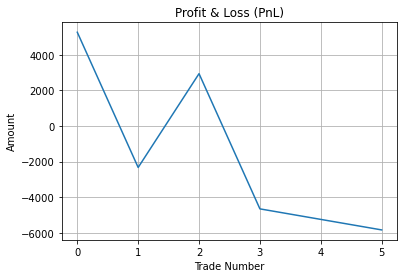

In [29]:
# Adding up the pnl of every trade and plotting it
tradelog['PnL Cumulative Sum'].plot(title = 'Profit & Loss (PnL)', xlabel = 'Trade Number', ylabel = 'Amount', grid = True)